
# 小地域の収入推定

```Data```フォルダには、小地域の収入データ(```income_district.csv```)と国勢調査の小地域集計データが格納されています。

国勢調査の小地域集計データ（人口構成、労働力構成、住宅形態など）から、その地域の収入を推定することが考えられます。推定のための機械学習・深層学習モデルを構築しなさい。


- データを観察・理解する上で、データの構造を説明しながら、適切なデータ整形を行いなさい
- データ構造や分析結果に対して、少なくとも二つの図で可視化を行いなさい
- モデルの精度を評価し、できるだけ精度が高いモデルを得るよう、適切な特徴量エンジニアリングやモデル選定の考えもまとめなさい


In [1]:
import pandas as pd

In [2]:
income=pd.read_csv(r"C:\Users\Harekaze\Desktop\chss2024_assignment\chss_2024_assignment\最終課題\Data\income_district.csv")
labor=pd.read_csv(r"C:\Users\Harekaze\Desktop\chss2024_assignment\chss_2024_assignment\最終課題\Data\h27_labor_df.csv")
job=pd.read_csv(r"C:\Users\Harekaze\Desktop\chss2024_assignment\chss_2024_assignment\最終課題\Data\h27_job_df.csv")
industry=pd.read_csv(r"C:\Users\Harekaze\Desktop\chss2024_assignment\chss_2024_assignment\最終課題\Data\h27_indusry_df.csv")
age=pd.read_csv(r"C:\Users\Harekaze\Desktop\chss2024_assignment\chss_2024_assignment\最終課題\Data\h27_age_df.csv")

In [3]:
display(income.head(), labor.head(), job.head(),industry.head(),age.head())

,area_code,income_mean
0,13228,480.984419
1,43514,439.775281
2,23237,487.507769
3,18208,505.495103
4,12238,385.423846


,district_id,district2_id,level_identifier,state_name,city_name,district_name,district2_name,labor_male,no_labor_male,labor_female,no_labor_female
0,23101,NaN,1,愛知県,名古屋市千種区,NaN,NaN,45761,15806,33891,32964
1,23101,10.0,2,愛知県,名古屋市千種区,青柳町,NaN,262,86,197,175
2,23101,1005.0,3,愛知県,名古屋市千種区,青柳町,５丁目,33,12,24,26
3,23101,1006.0,3,愛知県,名古屋市千種区,青柳町,６丁目,113,27,82,64
4,23101,1007.0,3,愛知県,名古屋市千種区,青柳町,７丁目,116,47,91,85


,district_id,district2_id,level_identifier,state_name,city_name,district_name,district2_name,A_administrative_male,B_professional_workers_male,C_office_workers_male,...,C_office_workers_female,D_sales_workers_female,E_service_workers_female,F_safety_workers_female,G_agriculture_workers_female,H_production_workers_female,I_transport_workers_female,J_construction_workers_female,K_cleaning_workers_female,L_other_wokers_female
0,13101,NaN,1,東京都,千代田区,NaN,NaN,1391,3359,2438,...,3291,1127,1023,65,1,235,8,16,192,1823
1,13101,10.0,2,東京都,千代田区,丸の内,NaN,X,X,X,...,X,X,X,X,X,X,X,X,X,X
2,13101,1001.0,3,東京都,千代田区,丸の内,１丁目,X,X,X,...,X,X,X,X,X,X,X,X,X,X
3,13101,1002.0,3,東京都,千代田区,丸の内,２丁目,X,X,X,...,X,X,X,X,X,X,X,X,X,X
4,13101,1003.0,3,東京都,千代田区,丸の内,３丁目,X,X,X,...,X,X,X,X,X,X,X,X,X,X


,district_id,district2_id,level_identifier,state_name,city_name,district_name,district2_name,A_agriculture_forestry_male,agriculture_male,B_fishing_male,...,K_real_estate_female,L_academic_female,M_accommodation_female,N_entertainment_female,O_education_female,P_health_care_female,Q_service_female,R_other_service_female,S_public_services_female,T_other_female
0,43101,NaN,1,熊本県,熊本市中央区,NaN,NaN,306,264,6,...,1127,1335,3898,2150,3058,9432,275,2841,1391,1989
1,43101,10.0,2,熊本県,熊本市中央区,安政町,NaN,-,-,-,...,3,-,4,2,-,2,-,2,-,1
2,43101,20.0,2,熊本県,熊本市中央区,井川淵町,NaN,-,-,-,...,2,1,4,2,5,6,-,2,2,1
3,43101,31.0,2,熊本県,熊本市中央区,出水,NaN,33,32,-,...,75,99,223,132,240,777,20,201,93,108
4,43101,3101.0,3,熊本県,熊本市中央区,出水,１丁目,-,-,-,...,11,10,21,15,21,62,2,19,10,10


,district_id,district2_id,level_identifier,state_name,city_name,district_name,district2_name,10-14,15-19,20-24,...,55-59_female,60-64_female,65-69_female,70-74_female,75-79_female,80-84_female,85-89_female,90-94_female,95-99_female,100_female
0,45201,NaN,1,宮崎県,宮崎市,NaN,NaN,19220,20777,17510,...,13420,15035,16040,11697,10052,9160,6430,3357,1021,208
1,45201,10.0,2,宮崎県,宮崎市,橘通西,NaN,32,56,61,...,35,47,43,44,20,16,9,5,3,1
2,45201,1001.0,3,宮崎県,宮崎市,橘通西,１丁目,9,6,11,...,15,15,16,14,7,7,4,3,-,-
3,45201,1002.0,3,宮崎県,宮崎市,橘通西,２丁目,2,10,18,...,4,10,11,14,2,2,3,1,3,1
4,45201,1003.0,3,宮崎県,宮崎市,橘通西,３丁目,-,1,-,...,1,-,-,2,-,1,-,-,-,-


In [4]:
display(len(income), len(labor), len(job),len(industry))

1245

251258

251258

251258

In [5]:
labor

,district_id,district2_id,level_identifier,state_name,city_name,district_name,district2_name,labor_male,no_labor_male,labor_female,no_labor_female
0,23101,NaN,1,愛知県,名古屋市千種区,NaN,NaN,45761,15806,33891,32964
1,23101,10.0,2,愛知県,名古屋市千種区,青柳町,NaN,262,86,197,175
2,23101,1005.0,3,愛知県,名古屋市千種区,青柳町,５丁目,33,12,24,26
3,23101,1006.0,3,愛知県,名古屋市千種区,青柳町,６丁目,113,27,82,64
4,23101,1007.0,3,愛知県,名古屋市千種区,青柳町,７丁目,116,47,91,85
...,...,...,...,...,...,...,...,...,...,...,...
251253,12463,140.0,2,千葉県,安房郡鋸南町,岩井袋,NaN,52,46,49,63
251254,12463,150.0,2,千葉県,安房郡鋸南町,中佐久間,NaN,112,67,92,95
251255,12463,160.0,2,千葉県,安房郡鋸南町,上佐久間,NaN,95,50,76,95
251256,12463,170.0,2,千葉県,安房郡鋸南町,奥山,NaN,21,9,10,24


In [6]:
labor11= labor[labor["district2_id"].isna()]
labor11

,district_id,district2_id,level_identifier,state_name,city_name,district_name,district2_name,labor_male,no_labor_male,labor_female,no_labor_female
0,23101,NaN,1,愛知県,名古屋市千種区,NaN,NaN,45761,15806,33891,32964
429,23102,NaN,1,愛知県,名古屋市東区,NaN,NaN,21403,6637,17626,14209
542,23103,NaN,1,愛知県,名古屋市北区,NaN,NaN,44853,17606,34961,33698
945,23104,NaN,1,愛知県,名古屋市西区,NaN,NaN,43786,14240,32761,27786
1172,23105,NaN,1,愛知県,名古屋市中村区,NaN,NaN,38918,14117,29065,24806
...,...,...,...,...,...,...,...,...,...,...,...
251081,12426,NaN,1,千葉県,長生郡長柄町,NaN,NaN,2173,1050,1508,1903
251131,12427,NaN,1,千葉県,長生郡長南町,NaN,NaN,2384,1274,1654,2226
251165,12441,NaN,1,千葉県,夷隅郡大多喜町,NaN,NaN,2645,1575,1939,2714
251229,12443,NaN,1,千葉県,夷隅郡御宿町,NaN,NaN,1740,1429,1425,2194


In [7]:
labor1= labor11.drop(columns=["district2_id","level_identifier","state_name","city_name","district_name","district2_name"])
labor1.head()

,district_id,labor_male,no_labor_male,labor_female,no_labor_female
0,23101,45761,15806,33891,32964
429,23102,21403,6637,17626,14209
542,23103,44853,17606,34961,33698
945,23104,43786,14240,32761,27786
1172,23105,38918,14117,29065,24806


In [8]:
merged1 = pd.merge(income, labor1, how='outer',
                  left_on='area_code', right_on='district_id')
merged1.head()

,area_code,income_mean,district_id,labor_male,no_labor_male,labor_female,no_labor_female
0,1101.0,449.979373,1101.0,57113,20794,50951,48126
1,1102.0,395.847532,1102.0,71331,32827,57985,62446
2,1103.0,404.742547,1103.0,67234,28412,53846,55796
3,1104.0,385.278248,1104.0,54404,19733,45165,40631
4,1105.0,397.451303,1105.0,54823,22001,47069,46166


In [9]:
#欠損値の処理
from sklearn.impute import SimpleImputer
import numpy as np

# '-'をNaNに変換
merged1.replace('-', np.nan, inplace=True)

# SimpleImputerを使ってNaNを中央値で置き換え
imputer = SimpleImputer(strategy='median')
merged1[["labor_male","no_labor_male","labor_female","no_labor_female","income_mean"]] = imputer.fit_transform(merged1[["labor_male","no_labor_male","labor_female","no_labor_female","income_mean"]])

In [10]:
#スケーリング
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scatterd_labor_male =  scaler.fit_transform(merged1[["labor_male"]])
scatterd_labor_female =  scaler.fit_transform(merged1[["labor_female"]])
scatterd_income =  scaler.fit_transform(merged1[["income_mean"]])
display(scatterd_labor_male,scatterd_labor_female,scatterd_income)

array([[0.28260149],
       [0.35296359],
       [0.33268834],
       ...,
       [0.00207355],
       [0.00645324],
       [0.00461229]])

array([[0.30864527],
       [0.35125672],
       [0.32618296],
       ...,
       [0.0014539 ],
       [0.00643352],
       [0.00247163]])

array([[0.41623812],
       [0.29952462],
       [0.31870314],
       ...,
       [0.42433769],
       [0.42433769],
       [0.42433769]])

In [11]:
merged2 = np.column_stack((scatterd_labor_male, scatterd_labor_female, scatterd_income))
merged2

array([[0.28260149, 0.30864527, 0.41623812],
       [0.35296359, 0.35125672, 0.29952462],
       [0.33268834, 0.32618296, 0.31870314],
       ...,
       [0.00207355, 0.0014539 , 0.42433769],
       [0.00645324, 0.00643352, 0.42433769],
       [0.00461229, 0.00247163, 0.42433769]])

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [13]:
# 特徴量とターゲットにデータを分ける
X = merged2[:, :2]  # 最初の2列を特徴量に
y = merged2[:, 2]   # 最後の1列をターゲットに

len(X) == len(y)

# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



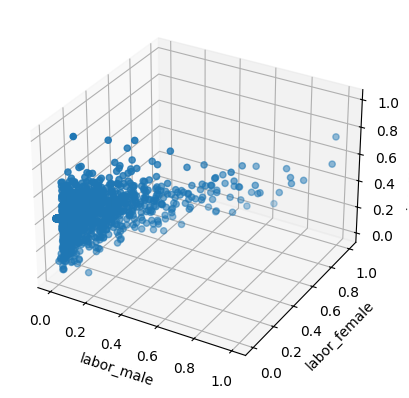

In [15]:
import matplotlib.pyplot as plt
# 3次元プロットを作成
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

labor_male = merged2[:,0]
labor_female = merged2[:,1]
income_mean =  merged2[:,2]
# 3D散布図を描画
ax.scatter(labor_male,labor_female, income_mean)

# プロットのラベルを設定
ax.set_xlabel("labor_male")
ax.set_ylabel("labor_female")
ax.set_zlabel("income_mean")

# プロットを表示
plt.show()

In [16]:
# モデルのインスタンスを作成
model = LinearRegression()
# モデルの訓練
model.fit(X_train, y_train)

LinearRegression()

In [17]:
# テストデータで予測
y_pred = model.predict(X_test)

# モデルの性能を評価 (平均二乗誤差を使用)
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Predictions:", y_pred)

Mean Squared Error: 0.011170562765858948
Predictions: [0.36061124 0.40525814 0.47876803 0.45709459 0.40389383 0.43496015
 0.40494479 0.414462   0.41094705 0.4059945  0.40285048 0.43075984
 0.40946428 0.40489611 0.40358174 0.40292069 0.43542229 0.41863426
 0.4192918  0.4097841  0.47056898 0.41103506 0.42415871 0.46693292
 0.40806381 0.44508952 0.40309875 0.40791616 0.42752924 0.42389118
 0.45447881 0.4036758  0.41179137 0.39981044 0.44730171 0.57404859
 0.40970377 0.42254722 0.46692042 0.40664676 0.40442163 0.40143807
 0.51901621 0.40988932 0.37624663 0.43550585 0.41297207 0.39862757
 0.40360985 0.42790667 0.46566616 0.42728246 0.40949943 0.44449562
 0.44555572 0.42529292 0.41015421 0.42291602 0.4112755  0.55259536
 0.39785003 0.45732802 0.40658123 0.37755759 0.40724657 0.40768069
 0.41520553 0.40841167 0.43224083 0.48536793 0.40416056 0.33600548
 0.43607941 0.40572159 0.41632885 0.39686226 0.49676164 0.45252366
 0.41812598 0.40306418 0.40501295 0.42655763 0.42940771 0.38152432
 0.40282

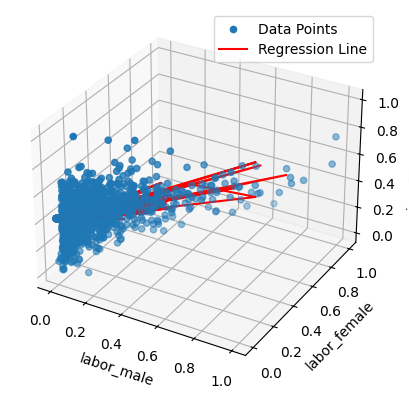

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 3次元プロットを作成
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# データをプロット
ax.scatter(labor_male, labor_female, income_mean, label='Data Points')

# X_testとy_predが2次元の特徴量とそれに対応する予測値であることを仮定しています
# 例えば、X_testが (labor_male, labor_female) の2次元特徴量で、y_predがincome_meanの予測値の場合
ax.plot(X_test[:, 0], X_test[:, 1], y_pred, color='red', label='Regression Line')

# プロットのラベルを設定
ax.set_xlabel("labor_male")
ax.set_ylabel("labor_female")
ax.set_zlabel("income_mean")

# 凡例を追加
ax.legend()

# プロットを表示
plt.show()
